### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import dataretrieval.nwis as nwis

In [ ]:
# get instantaneous values (iv)
df = nwis.get_record(sites=site, service='iv', start='2017-12-31', end='2018-01-01')


### Read data from USGS website.  
Other gages can be read by changing the site_no in the url.

In [2]:
url = 'https://waterdata.usgs.gov/nwis/measurements?site_no=05320500&agency_cd=USGS&format=rdb_expanded'
df = pd.read_csv(url,comment="#",sep='\t')
df = df.drop(df.index[0])
df['date']=pd.to_datetime(df['measurement_dt'])
df = df.set_index(df['date'])

### Clean dataframe

In [3]:
df = df.dropna(how = 'any',subset=['chan_area'])
df['chan_area']=df['chan_area'].astype('float')/3.281**2
df['discharge_va']=df['discharge_va'].astype('float')/3.281**3
df['gage_height_va']=df['gage_height_va'].astype('float')/3.281
df['chan_width']=df['chan_width'].astype('float')/3.281

### Plot cross-sectional area

<AxesSubplot:xlabel='Q (cms)', ylabel='area (sq m)'>

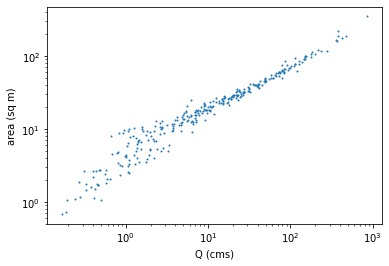

In [4]:
df.plot(x='discharge_va', 
        y='chan_area', 
        kind = 'scatter', 
        logx = True, 
        logy = True, 
        xlabel='Q (cms)', 
        ylabel='area (sq m)',
        s=1)

### Plot cross-sectional area, width, and stage

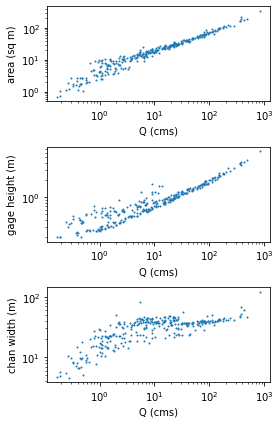

In [5]:
fig, ax = plt.subplots(3,1)
df.plot(ax = ax[0], 
        x='discharge_va', 
        y='chan_area', 
        kind = 'scatter', 
        logx = True, 
        logy = True, 
        xlabel='Q (cms)', 
        ylabel='area (sq m)', 
        s=1)
df.plot(ax = ax[1], 
        x='discharge_va', 
        y='gage_height_va', 
        kind = 'scatter', 
        logx = True, 
        logy = True, 
        xlabel='Q (cms)', 
        ylabel='gage height (m)',
        s=1)
df.plot(ax = ax[2], 
        x='discharge_va', 
        y='chan_width', 
        kind = 'scatter', 
        logx = True, 
        logy = True, 
        xlabel='Q (cms)', 
        ylabel='chan width (m)',
        s=1)
fig.set_size_inches(4,6)
fig.tight_layout()
